# VC Dimension

##### The Maximum number of points h that can be arranged such that f(x) can shatter them

##### For a straight line classifier of d dimensions with an intercept: VC Dimension = d + 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import cvxopt
from cvxopt import matrix, solvers
import cvxopt.solvers
import matplotlib

In [2]:
def plot_db(X,y,w,b, x_min=-1, y_min=-1, x_max=10, y_max=10):

    xx = np.linspace(x_min, x_max)
    a = -w[0]/w[1]
    yy = a*xx - (b)/w[1]
    margin = 1 / np.sqrt(np.sum(w**2))
    yy_neg = yy - np.sqrt(1 + a**2) * margin
    yy_pos = yy + np.sqrt(1 + a**2) * margin
    plt.figure(figsize=(8, 8))
    plt.plot(xx, yy, "b-")
    # plt.plot(xx, yy_neg, "m--")
    # plt.plot(xx, yy_pos, "m--")
    colors = ["red", "green"]
    plt.scatter(X[:, 0], X[:, 1], s=100, c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.show()

In [3]:
class SVM:
    def __init__(self, kernel="no", C=0):
        self.kernel = kernel
        self.C = C
        

    def fit(self, X, y):
        n_samples, n_features = X.shape

        n = X.shape[0]
        H = np.dot(y * X, (y * X).T)
        q = np.repeat([-1.0], n)[..., None]

        A = y.reshape(1, -1).astype(float)
        b = 0.0

        if self.C is None or self.C == 0:
            G = np.negative(np.eye(n))
            h = np.zeros(n)
        else:
            G = matrix(np.vstack((np.eye(n) * -1, np.eye(n))))
            h = matrix(np.hstack((np.zeros(n), np.ones(n) * self.C)))

        P = matrix(H)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A)
        b = matrix(b)

        # solve QP problem
        solution = solvers.qp(P, q, G, h, A, b, kktsolver='ldl', options={'kktreg':1e-9})

        # Lagrange multipliers
        a = np.array(solution["x"])

        self.w = np.dot((y * a).T, X)[0]
        S = (a > 1e-5).flatten()
        self.b = np.mean(y[S] - np.dot(X[S], self.w.reshape(-1, 1)))


    def predict(self, X):
        predicted_color = np.dot(np.transpose(self.w), np.array(X)) + self.b

        if predicted_color < 0:
            return -1
        elif predicted_color > 0:
            return 1
        else:
            return 0

### In case of two dimensions:
1. Classifying <b>One</b> point:
> <b>Successful</b> (No Counterexample that can prove otherwise)

     pcost       dcost       gap    pres   dres
 0: -1.1634e-01 -3.2687e-01  2e-01  1e-09  1e+00
 1: -1.1754e-01 -1.1982e-01  2e-03  2e-10  4e-02
 2: -1.1765e-01 -1.1767e-01  2e-05  2e-10  4e-04
 3: -1.1765e-01 -1.1765e-01  2e-07  2e-10  4e-06
 4: -1.1765e-01 -1.1765e-01  2e-09  2e-10  4e-08
Optimal solution found.


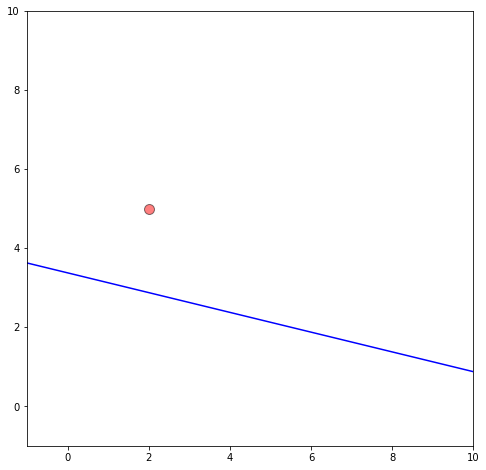

In [4]:
X = np.array([
    [1,1],
    [2,5],
], dtype=float)
y = np.array([-1,1]).reshape(-1,1)
clf = SVM()
clf.fit(X, y)
w = clf.w
b = clf.b
plot_db(X[1:],y[1:],w,b)

2. Classifying <b>Two</b> points: <b>Successful</b> (No Counterexample that can prove otherwise)

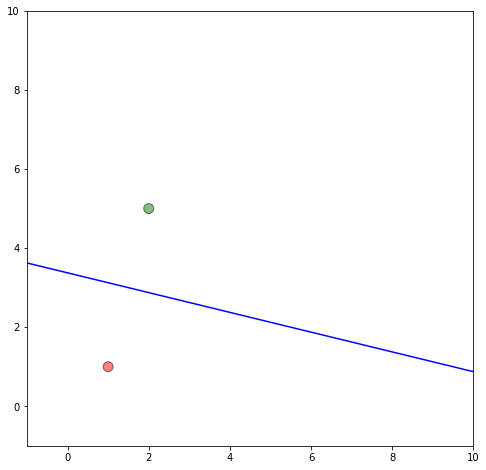

In [5]:
plot_db(X,y,w,b)

3. Classifying <b>Three</b> points:
> <b>Successful</b> (No Counterexample that can prove otherwise)

     pcost       dcost       gap    pres   dres
 0: -2.5079e-01 -6.5490e-01  4e+00  2e+00  1e+00
 1: -1.8254e-01 -5.5669e-01  4e-01  1e-09  1e-10
 2: -2.4703e-01 -2.7674e-01  3e-02  9e-10  8e-11
 3: -2.4991e-01 -2.5030e-01  4e-04  4e-10  9e-12
 4: -2.5000e-01 -2.5000e-01  4e-06  4e-10  2e-13
 5: -2.5000e-01 -2.5000e-01  4e-08  4e-10  4e-15
Optimal solution found.


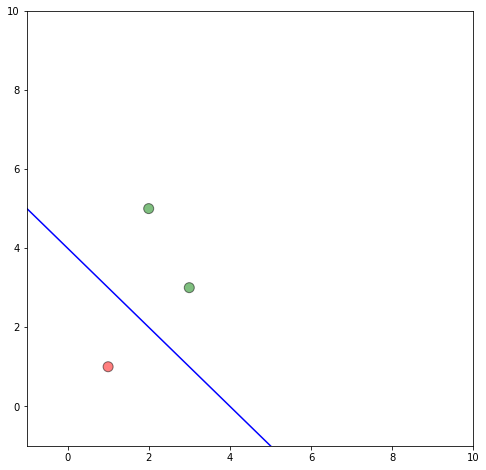

In [6]:
X = np.array([
    [1,1],
    [2,5],
    [3,3],
], dtype=float)
y = np.array([-1,1, 1]).reshape(-1,1)
clf.fit(X, y)
w = clf.w
b = clf.b
plot_db(X,y,w,b)

In [7]:
X = np.array([
    [1,7],
    [2,5],
    [3,8],
    [4,6],
], dtype=float)
y = np.array([-1,-1,1,-1]).reshape(-1,1)



# clf = SVM(kernel="linear", C=100)
clf.fit(X, y)
w = clf.w
b = clf.b
print("W:", w)
print("b:", b)
old_w = w
old_b = b

     pcost       dcost       gap    pres   dres
 0: -1.1944e+00 -2.3611e+00  8e+00  3e+00  2e+00
 1: -3.7105e-01 -1.7744e+00  1e+00  1e-08  3e-10
 2: -7.5330e-01 -8.4859e-01  1e-01  5e-09  2e-10
 3: -7.9939e-01 -8.0049e-01  1e-03  1e-09  1e-11
 4: -7.9999e-01 -8.0000e-01  1e-05  1e-09  3e-13
 5: -8.0000e-01 -8.0000e-01  1e-07  1e-09  7e-15
Optimal solution found.
W: [0.40000001 1.20000004]
b: -9.800000291535687


4. Classifying <b>Four</b> points:
> Can be successful in some cases

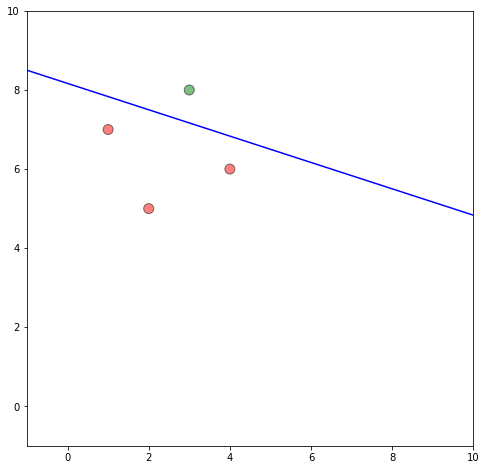

In [8]:
plot_db(X,y,w,b)

### Counterexample:
> The SVM will fail to classify these four points

In [9]:
X = np.array([
    [1,7],
    [2,5],
    [3,8],
    [4,6],
], dtype=float)
y = np.array([-1,1,1,-1]).reshape(-1,1)




clf.fit(X, y)
w = clf.w
b = clf.b
print("W:", w)
print("b:", b)

     pcost       dcost       gap    pres   dres
 0: -4.0000e+00 -8.0000e+00  4e+00  2e-09  2e+00
 1: -9.9400e+00 -1.0039e+01  1e-01  3e-09  1e+00
 2: -1.0038e+03 -1.0039e+03  1e-01  8e-09  1e+00
 3: -9.9647e+10 -2.4823e+12  2e+12  1e-01  2e+01
 4: -1.0264e+11 -1.2719e+11  2e+10  5e+01  1e+00
 5: -1.0661e+11 -1.0687e+11  3e+08  5e+01  1e+00
 6: -1.1058e+11 -1.1058e+11  3e+06  5e+01  1e+00
 7: -1.1454e+11 -1.1454e+11  3e+04  6e+01  1e+00
 8: -1.1851e+11 -1.1851e+11  3e+02  6e+01  1e+00
 9: -1.2247e+11 -1.2247e+11  3e+00  6e+01  1e+00
10: -1.2643e+11 -1.2643e+11  3e-02  6e+01  1e+00
11: -1.3039e+11 -1.3039e+11  3e-04  6e+01  1e+00
12: -1.3436e+11 -1.3436e+11  3e-06  7e+01  1e+00
13: -1.3834e+11 -1.3834e+11  3e-08  7e+01  1e+00
14: -1.4229e+11 -1.4229e+11  3e-10  7e+01  1e+00
15: -1.4625e+11 -1.4625e+11  3e-12  7e+01  1e+00
16: -1.5021e+11 -1.5021e+11  4e-14  7e+01  1e+00
17: -1.5417e+11 -1.5417e+11  4e-16  8e+01  1e+00
18: -1.5814e+11 -1.5814e+11  4e-18  8e+01  1e+00
19: -1.6211e+11 -1.62

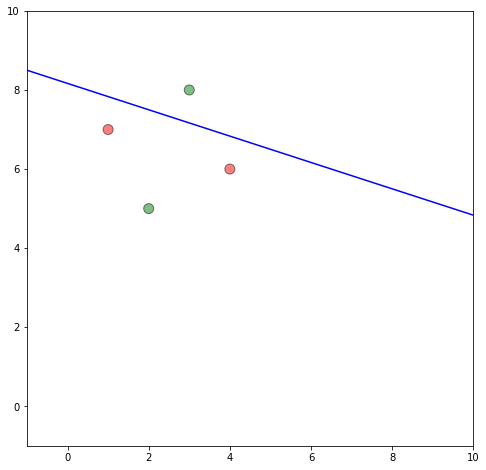

In [10]:
plot_db(X,y,old_w,old_b)

## Conclusion
> Since SVM can classify a maximum of three points with zero error given two dimensions
> <h3>VC Dimension = 3 = # of dimensions + 1</h3>

## Generalization Error

In [11]:
def get_data(filename):
    df = pd.read_csv(filename)
    df.color = df.color.replace(0, -1)
    X = df[['x', 'y']].to_numpy()  # iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
    y = df['color'].to_numpy().reshape((-1, 1))  # iris_df[["target"]].to_numpy()
    return X, y

In [12]:
X,y = get_data('non-separable-data.csv')
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3)
model = svm.SVC()
# train the model using the training data
model.fit(X_train, y_train.ravel())

# use cross-validation to estimate the generalization error
scores = cross_val_score(model, X_test, y_test.ravel(), cv=5)

# the generalization error is the average of the scores
generalization_error = 1 - np.mean(scores)
generalization_error

0.0397390272835112